# Convolutional Neural Network

Que1: What is CNN? How does it work behind the scenes?

Que2: What are Stride, Padding, Kernel Filters, and Pooling?

Que3: Why does Overfitting happen in CNN, and how can you avoid it?

Que4: Why is InceptionNet better than VGG?

Que5: What is Augmentation?

Que6: Can you explain the concept of feature maps in CNNs?

In [ ]:
Q1.
A Convolutional Neural Network (CNN) is a specialized type of deep learning algorithm mainly designed for tasks that necessitate object recognition, including image classification, detection, and segmentation.
It is made up of multiple layers, including convolutional layers, pooling layers, and fully connected layers. 

how it works --->
CNNs use a series of convolutional layers to extract features from images.
Each convolutional layer applies a filter to the input image, and the output of the filter is a feature map. 
The feature maps are then passed through a series of pooling layers, which reduce their size and dimensionality. 
Finally, the output of the pooling layers is fed into a fully connected layer, which produces the final output of the network.


Q2.
-Stride is the number of pixels shifts over the input matrix. A stride of 1 means the kernel moves one pixel at a time, while a stride of 2 means it moves two pixels at a time.

-A pooling layer is another building block of a CNN. Pooling Its function is to progressively reduce the spatial size of the representation to reduce the network complexity and computational cost.
There are two types of widely used pooling in CNN layer:
Max Pooling
Average Pooling

-Adding extra pixels around the border of the input data to control the spatial size of the output feature map. 
Common padding types are 'valid' (no padding) and 'same' (padding to keep the output size the same as the input size).


Q3.
Overfitting happens in Convolutional Neural Networks (CNNs) when the model learns the training data too well,
including the noise and specific details that don't apply to new data. 
This makes the model perform well on training data but poorly on new data.
CNNs with many layers can learn very detailed patterns, including irrelevant ones.

- Data Augmentation , Dropout, Early Stopping, Batch Normalization , regularization (L1,L2) by all these methods we can prevent overfitting.


Q5.
Data augmentation is the process of transforming images to create new ones, for training machine learning models. 
This is an important step when building datasets.
data augmentation can greatly improve accuracy on image tasks, such as classification and segmentation. 
Further, large neural networks, or deep learning models, need a huge amount of data, so they benefit even more from data augmentation techniques.


Q6.
Feature maps are the output produced by a convolutional layer in a CNN after applying a filter (or kernel) to the input data. 
They represent the presence of specific features in different regions of the input data.


Q4.
Inception net is going deeper to improve the performance and accuracy but compromising the computational cost. 
 It is the winner of the ImageNet Large Scale Visual Recognition Competition in 2014, 
    an image classification competition, which has a significant improvement over ZFNet (The winner in 2013), 
    AlexNet (The winner in 2012) and has relatively lower error rate compared with the VGGNet (1st runner-up in 2014). 

# Machine Learning Techniques

### Problem statement and Objective

#### Black Friday Project

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month. Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.






### Data Variable Definition 
• User_ID User ID 


• Product_ID Product ID 


• Gender Sex of User 


• Age Age in bins 


• Occupation Occupation (Masked)


• City_Category Category of the City (A,B,C) 


• Stay_In_Current_City_Years Number of years stay in current city 


• Marital_Status Marital Status 


• Product_Category_1 Product Category (Masked)


• Product_Category_2 Product may belongs to other category also (Masked) 


• Product_Category_3 Product may belongs to other category also (Masked)


• Purchase Purchase Amount (Target Variable) 



### Goal

Our goal is to predict the purchase amount of customers for various products after completing all the necessary preprocessing steps. Additionally, hyperparameter tuning and cross validation is essential. We also need to apply feature selection techniques such as SelectKBest, VIF, and PCA. 

#Dataset Link


https://raw.githubusercontent.com/s4sauravv/Datasets/main/Black%20Friday.csv


You have to use multiple algorithms to build the model, and whichever algorithm performs the best, you have to do hyperparameter tuning for it. After tuning the hyperparameters, you also need to plot its best fit line.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA

In [37]:
url = "https://raw.githubusercontent.com/s4sauravv/Datasets/main/Black%20Friday.csv"
data = pd.read_csv(url)


In [38]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB
None


In [39]:
print(data.head())

   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN   

In [40]:
data.shape

(550068, 12)

In [41]:
print(data.describe())

            User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       376430.000000       166821.000000  550068.000000  
mean             9.842329           12.668243    9263.968713  
std              5.086590            4.125338    5023.065394  
min              2.000000            3.000000      12.000000  
25%              5

In [42]:
data['Product_Category_2'].fillna(-999, inplace=True)
data['Product_Category_3'].fillna(-999, inplace=True)
# by using fillna method handling missing values


In [43]:
# Encoding categorical variables
cat_f = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
num_f = ['Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), num_f),
        ('cat', OneHotEncoder(drop='first'), cat_f)
    ])

In [44]:
# here i am Applying the preprocessing to feature set
X = data.drop(['User_ID', 'Product_ID', 'Purchase'], axis=1)
y = data['Purchase']

X_preprocess = preprocessor.fit_transform(X)

In [45]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select the top 10 features
selector = SelectKBest(f_regression, k=10)
X_new = selector.fit_transform(X_preprocess, y)


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')


MAE: 3508.1215804823023
MSE: 21192478.422737755
R2: 0.1565578822888003


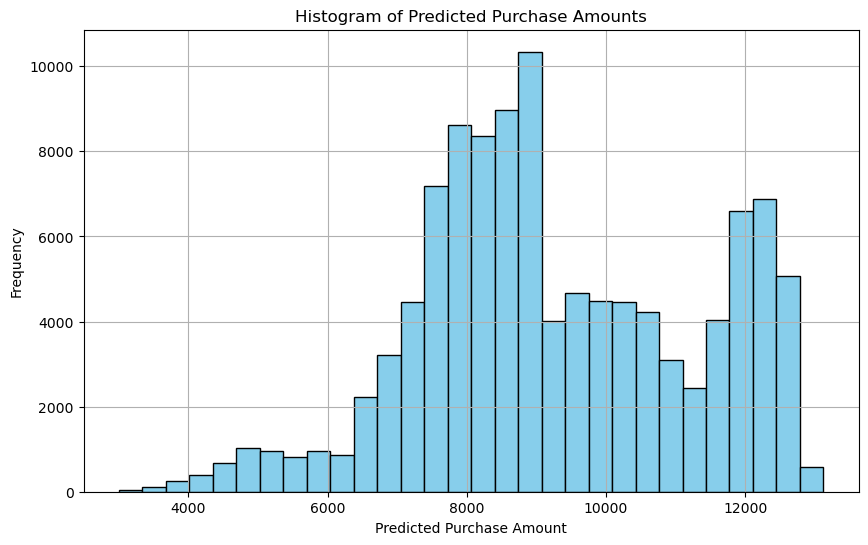

In [48]:
import matplotlib.pyplot as plt

# Plot histogram of predicted purchase amounts
plt.figure(figsize=(10, 6))
plt.hist(y_pred, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Predicted Purchase Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Purchase Amounts')
plt.grid(True)
plt.show()


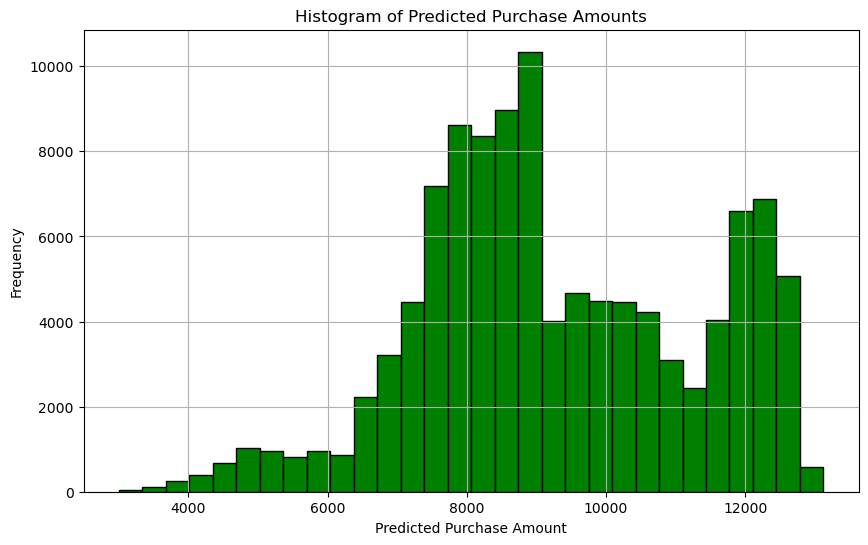

In [49]:
# Plot histogram of predicted purchase amounts
plt.figure(figsize=(10, 6))
plt.hist(y_pred, bins=30, color='green', edgecolor='black')
plt.xlabel('Predicted Purchase Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Purchase Amounts')
plt.grid(True)


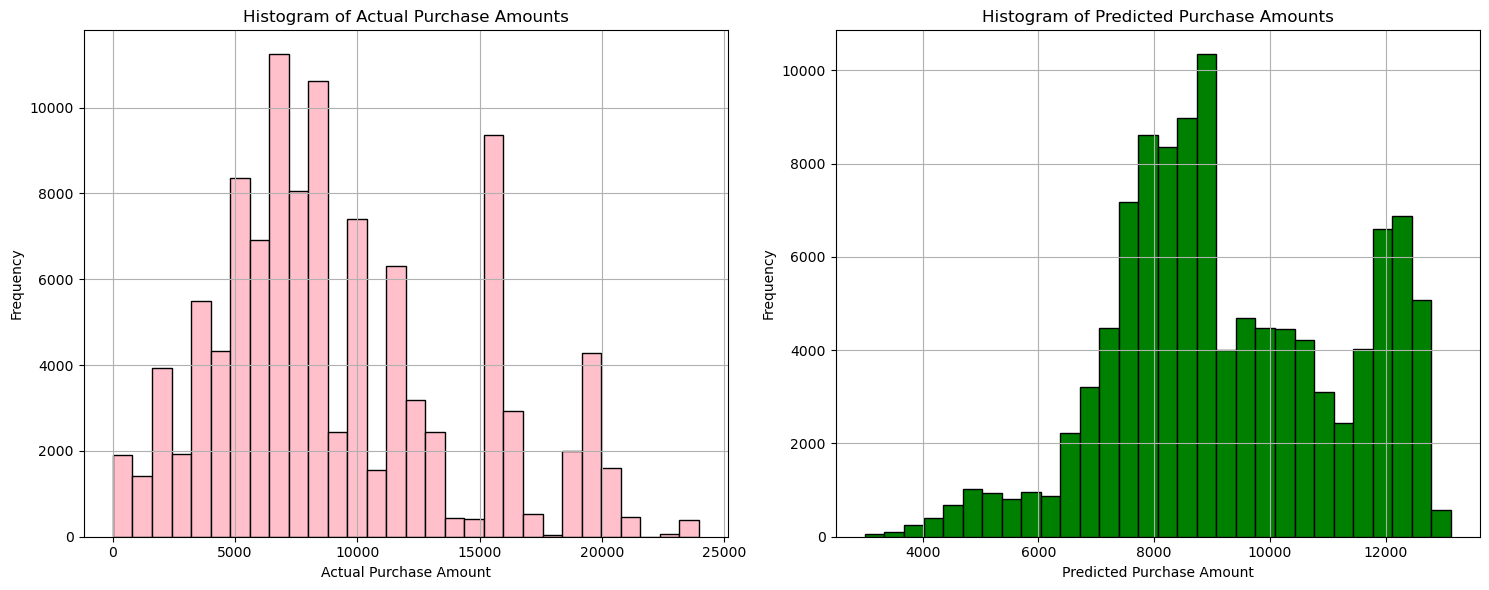

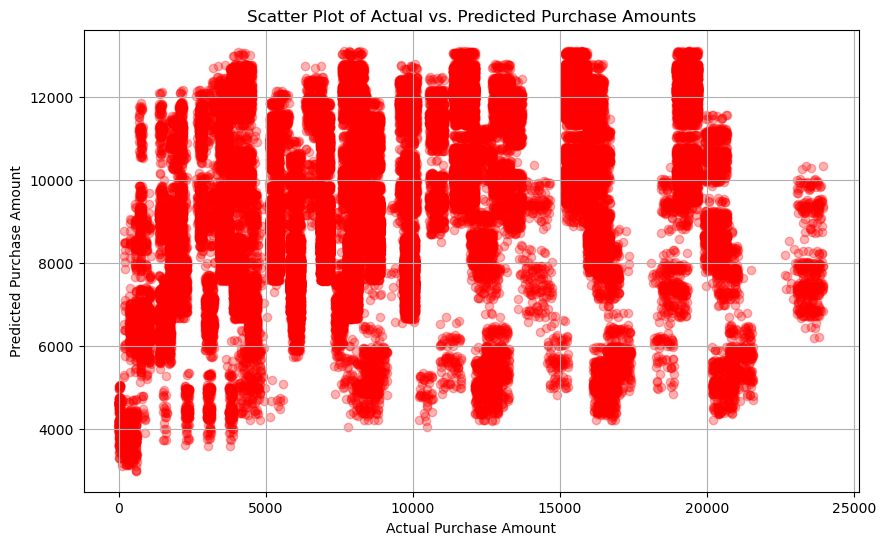

In [50]:
import matplotlib.pyplot as plt

# Create a figure with subplots
plt.figure(figsize=(15, 6))

# Plot histogram of actual purchase amounts
plt.subplot(1, 2, 1)
plt.hist(y_test, bins=30, color='pink', edgecolor='black')
plt.xlabel('Actual Purchase Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Purchase Amounts')
plt.grid(True)

# Plot histogram of predicted purchase amounts
plt.subplot(1, 2, 2)
plt.hist(y_pred, bins=30, color='green', edgecolor='black')
plt.xlabel('Predicted Purchase Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Purchase Amounts')
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Plot scatter plot of actual vs. predicted purchase amounts
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='red')
plt.xlabel('Actual Purchase Amount')
plt.ylabel('Predicted Purchase Amount')
plt.title('Scatter Plot of Actual vs. Predicted Purchase Amounts')
plt.grid(True)
plt.show()
